# Vehicle Price Analysis Project

## Introduction

Welcome to the Vehicle Price Analysis project. As an analyst at Crankshaft List, you are tasked with analyzing a vast dataset of vehicle advertisements to uncover the factors influencing vehicle prices. Every day, hundreds of free vehicle ads are posted on our company's website, and this project aims to leverage the data collected over the years to provide insights into pricing dynamics.

## Project Description

The goal of this project is to analyze historical vehicle advertisement data to identify key factors that affect vehicle prices. This involves cleaning and preprocessing the data, conducting exploratory data analysis, and ultimately determining which variables most significantly impact vehicle pricing.

## Project Instructions

### Step 1: Data Loading and Initial Examination

- Load the dataset located.
- Examine the general information of the dataset to understand its structure and contents.

### Step 2: Data Preprocessing

#### Handling Missing Values:
- Identify and examine missing values in the dataset.
- For columns where it is reasonable to infer missing values (e.g., Boolean columns), fill in the missing values accordingly.
- For other columns, determine the best approach to handle missing values, considering the significance and impact of the missing data.

#### Data Type Conversion:
- Identify columns that need data type conversions and explain the rationale behind these changes.

### Step 3: Feature Engineering

- Add columns for the day of the week, month, and year the advertisement was posted.
- Calculate the age of the vehicle (in years) at the time of the advertisement.
- Compute the average annual mileage for each vehicle.
- Convert the `condition` column's string values to a numeric scale:
  - `new` = 5
  - `like new` = 4
  - `excellent` = 3
  - `good` = 2
  - `fair` = 1
  - `salvage` = 0

### Step 4: Exploratory Data Analysis

- Analyze key parameters: price, vehicle age, mileage, number of cylinders, and condition. Create histograms for each parameter and examine the effect of outliers on the histogram shapes.
- Identify outliers and remove them. Save the outliers in a separate DataFrame and continue analysis with the filtered data.
- Create new histograms without outliers and compare them with the original ones, drawing conclusions for each parameter.
- Analyze the number of days advertisements are listed (`days_listed`). Create a histogram, calculate the mean and median, and explain typical advertisement durations. Identify quickly removed ads and those listed for extended periods.
- Analyze the number of advertisements and average prices for each vehicle type. Create a graph showing the relationship between the number of ads and vehicle type, focusing on the two most frequently advertised types.

### Step 5: Detailed Analysis of Price Influencing Factors

- Investigate factors that most significantly influence vehicle prices. For the most popular vehicle types identified, analyze whether the price depends on age, mileage, condition, transmission type, and color.
- Create boxplots for categorical variables (transmission type and color) and scatter plots for continuous variables (age, mileage, and condition). Ensure each category has at least 50 ads to maintain validity.

## Conclusion

- Summarize findings from the analysis.
- Discuss key factors influencing vehicle prices.
- Provide recommendations based on the analysis results.

## Data Description

The dataset contains the following columns:

- `price`: Vehicle price
- `model_year`: Model year of the vehicle
- `model`: Vehicle model
- `condition`: Condition of the vehicle
- `cylinders`: Number of cylinders
- `fuel`: Type of fuel (gas, diesel, etc.)
- `odometer`: Mileage of the vehicle at the time of advertisement
- `transmission`: Transmission type
- `paint_color`: Color of the vehicle
- `is_4wd`: Whether the vehicle has four-wheel drive (Boolean)
- `date_posted`: Date the advertisement was posted
- `days_listed`: Number of days the advertisement was listed before being removed

By following these steps, we aim to gain a comprehensive understanding of the factors affecting vehicle prices and provide actionable insights for Crankshaft List. Let's get started!


**Data Loading and Initial Examination**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('/content/vehicles_us.csv')

lets find out some informations regarding the data that we currently have.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [6]:
data.sample(5)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
47987,13545,2013.0,honda cr-v,excellent,4.0,gas,82492.0,automatic,SUV,red,1.0,2018-10-13,27
46073,11300,2014.0,chevrolet equinox,good,6.0,gas,96884.0,automatic,SUV,white,1.0,2018-10-12,44
25425,5295,2012.0,nissan rogue,good,4.0,gas,128382.0,automatic,wagon,custom,NaN,2019-03-16,30
36350,2700,2003.0,volkswagen jetta,good,4.0,gas,NaN,manual,sedan,grey,NaN,2018-12-20,92
25601,7999,2012.0,kia sorento,like new,4.0,gas,102947.0,automatic,SUV,red,NaN,2018-08-17,39


Based on informations and data sample, there are some anomalies on the data that need to further investigations.

There are some columns that have data type that need to be corrected such as:

- model_year supposed to be integer.
- cylinders supposed to be integer.
- odometer supposed to be integer.
- is_4wd supposed to be boolean, when the value stated as 1 it means Yes, if its Nan then No (calculation on chapter 1.2).

Based on information, we can see some missing value can be found in columns bellow:

- model_year
- cylinders
- odometer
- paint_color
- is_4wd.


Based on the data loadment process, we have found some issues as bellow:

1. Data type issue : some column may have type that not suitable for further analysis.
2. Missing values : there are some missing values in 5 columns.

This faulty may deffect the analysis and resulting bias number that will be affecting the decision making process in the future. Therefore some action are needed:

1. Proper the data type in column model_year, cylinders, odometer, and is_4wd into integer.
2. Take action the missing value which we will discuss later based on the condition in each column. Those columns are model_year, cylinders, odometer, paint_color, and is_4wd.

**Data Preprocessing**

Let us take a look on missing value on those 5 columns and see how many of them that might affect the integrity of analysis.

In [7]:
null_df = data.isnull().sum()
lost_df = pd.DataFrame(null_df, columns=['counts']).rename_axis('columns')
lost_df['percent%'] = round(lost_df['counts'] / data.shape[0] * 100, 2).astype(str)+'%'
lost_df.sort_values('percent%', ascending=False)

,counts,percent%
columns,,
model_year,3619,7.02%
is_4wd,25953,50.37%
paint_color,9267,17.99%
odometer,7892,15.32%
cylinders,5260,10.21%
price,0,0.0%
model,0,0.0%
condition,0,0.0%
fuel,0,0.0%


Handling missing value in column is_4wd

In [9]:
data['is_4wd'].unique()

array([ 1., nan])

In the column is_4wd we need to

fill missing value with 0 to indicate that specific vehicle is not 4 wheel drive, instead of leave it blank.

In [10]:
data['is_4wd'] = data['is_4wd'].fillna(0)

In [11]:
data['is_4wd'].unique()

array([1., 0.])

Handling missing value in column paint_color

In [12]:
data['paint_color'].unique()

array([nan, 'white', 'red', 'black', 'blue', 'grey', 'silver', 'custom',
       'orange', 'yellow', 'brown', 'green', 'purple'], dtype=object)

In [13]:
nan_color = data.loc[data['paint_color'].isna()]
nan_color

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,0.0,2019-03-22,9
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
12,18990,2012.0,ram 1500,excellent,8.0,gas,140742.0,automatic,pickup,NaN,1.0,2019-04-02,37
21,5250,2007.0,toyota rav4,good,6.0,gas,154000.0,automatic,SUV,NaN,0.0,2018-08-22,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51502,7995,2011.0,chevrolet equinox,like new,4.0,gas,111088.0,automatic,SUV,NaN,0.0,2019-04-01,175
51503,6595,2011.0,chevrolet malibu,excellent,4.0,gas,100780.0,automatic,sedan,NaN,0.0,2019-02-27,73
51506,28900,2017.0,ford f150 supercrew cab xlt,good,6.0,gas,49225.0,automatic,pickup,NaN,1.0,2019-04-11,25
51519,11750,2015.0,honda accord,excellent,4.0,gas,NaN,automatic,coupe,NaN,0.0,2018-11-24,89


Because the limitation of the information of the data project that given, we can fill the missing value in column paint_color with value "unstated" instead of leave it blank

In [14]:
data['paint_color'] = data['paint_color'].fillna('unstated')

In [15]:
data['paint_color'].unique()

array(['unstated', 'white', 'red', 'black', 'blue', 'grey', 'silver',
       'custom', 'orange', 'yellow', 'brown', 'green', 'purple'],
      dtype=object)

Handling missing value in column model_year & cylinders

In [16]:
grouped_by_model = data.groupby('model').agg({'model_year': 'median', 'cylinders': 'median'})
for model in data['model'].unique():
  data.loc[(data['model'] == model) & (data['model_year'].isna()), 'model_year'] = \
      grouped_by_model.loc[grouped_by_model.index == model, 'model_year'][0]
  data.loc[(data['model'] == model) & (data['cylinders'].isna()), 'cylinders'] = \
      grouped_by_model.loc[grouped_by_model.index == model, 'cylinders'][0]

In [17]:
null_df = data.isnull().sum()
lost_df = pd.DataFrame(null_df, columns=['counts']).rename_axis('columns')
lost_df['percent%'] = round(lost_df['counts'] / data.shape[0] * 100, 2).astype(str)+'%'
lost_df.sort_values('percent%', ascending=False)

,counts,percent%
columns,,
odometer,7892,15.32%
price,0,0.0%
model_year,0,0.0%
model,0,0.0%
condition,0,0.0%
cylinders,0,0.0%
fuel,0,0.0%
transmission,0,0.0%
type,0,0.0%


The missing value in column model_year and cylinders has been filled with median.

Handling missing value in column odometer

In [18]:
grouped_by_condition = data.groupby('condition').agg({'odometer': 'mean', 'price': 'mean'})
for cond in data['condition'].unique():
  data.loc[(data['condition'] == cond) & (data['odometer'].isna()), 'odometer'] = \
      grouped_by_condition.loc[grouped_by_condition.index == cond, 'odometer'][0]
  data.loc[(data['condition'] == cond) & (data['price'].isna()), 'price'] = \
      grouped_by_condition.loc[grouped_by_condition.index == cond, 'price'][0]

In [19]:
null_df = data.isnull().sum()
lost_df = pd.DataFrame(null_df, columns=['counts']).rename_axis('columns')
lost_df['percent%'] = round(lost_df['counts'] / data.shape[0] * 100, 2).astype(str)+'%'
lost_df.sort_values('percent%', ascending=False)

,counts,percent%
columns,,
price,0,0.0%
model_year,0,0.0%
model,0,0.0%
condition,0,0.0%
cylinders,0,0.0%
fuel,0,0.0%
odometer,0,0.0%
transmission,0,0.0%
type,0,0.0%


Data Type Conversion

In [22]:
data['model_year'] = data['model_year'].astype(int)
data['cylinders'] = data['cylinders'].astype(int)
data['days_listed'] = data['days_listed'].astype(int)
data['odometer'] = data['odometer'].astype(int)
data['is_4wd'] = data['is_4wd'].astype(bool)
data['date_posted'] = pd.to_datetime(data['date_posted'], format='%Y-%m-%d')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  float64       
 1   model_year    51525 non-null  int64         
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   cylinders     51525 non-null  int64         
 5   fuel          51525 non-null  object        
 6   odometer      51525 non-null  int64         
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   51525 non-null  object        
 10  is_4wd        51525 non-null  bool          
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
dtypes: bool(1), datetime64[ns](1), float64(1), int64(4), object(6)
memory usage: 4.8+ MB


In [23]:
data.head(5)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400.0,2011,bmw x5,good,6,gas,145000,automatic,SUV,unstated,True,2018-06-23,19
1,25500.0,2011,ford f-150,good,6,gas,88705,automatic,pickup,white,True,2018-10-19,50
2,5500.0,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,False,2019-02-07,79
3,1500.0,2003,ford f-150,fair,8,gas,183062,automatic,pickup,unstated,False,2019-03-22,9
4,14900.0,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,False,2019-04-02,28


All data type is now proper

**Feature Engineering**

In [25]:
# Add time and date values ​​when the ad is displayed
data['weekday_posted'] = data['date_posted'].dt.weekday
data['year_posted'] = data['date_posted'].dt.year
data['month_posted'] = data['date_posted'].dt.month

In [26]:
data.head(2)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_posted,year_posted,month_posted
0,9400.0,2011,bmw x5,good,6,gas,145000,automatic,SUV,unstated,True,2018-06-23,19,5,2018,6
1,25500.0,2011,ford f-150,good,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,4,2018,10


In [27]:
# Add the age of the vehicle when the ad is displayed
data['car_age'] = (data['year_posted'] - data['model_year']).astype(int) + 1

In [28]:
data.head(2)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_posted,year_posted,month_posted,car_age
0,9400.0,2011,bmw x5,good,6,gas,145000,automatic,SUV,unstated,True,2018-06-23,19,5,2018,6,8
1,25500.0,2011,ford f-150,good,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,4,2018,10,8


In [29]:
# Add the average vehicle mileage per year
data['odo_per_year'] = data['odometer'] / data['car_age']
data.head(2)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_posted,year_posted,month_posted,car_age,odo_per_year
0,9400.0,2011,bmw x5,good,6,gas,145000,automatic,SUV,unstated,True,2018-06-23,19,5,2018,6,8,18125.000
1,25500.0,2011,ford f-150,good,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,4,2018,10,8,11088.125


In [30]:
data['condition'] = data['condition'].replace({'new' : 5,
                                               'like new' : 4,
                                               'excellent' : 3,
                                               'good' : 2,
                                               'fair' : 1,
                                               'salvage' : 0})

In [31]:
data.head(2)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_posted,year_posted,month_posted,car_age,odo_per_year
0,9400.0,2011,bmw x5,2,6,gas,145000,automatic,SUV,unstated,True,2018-06-23,19,5,2018,6,8,18125.000
1,25500.0,2011,ford f-150,2,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,4,2018,10,8,11088.125


In [32]:
data.isna().sum()

price             0
model_year        0
model             0
condition         0
cylinders         0
fuel              0
odometer          0
transmission      0
type              0
paint_color       0
is_4wd            0
date_posted       0
days_listed       0
weekday_posted    0
year_posted       0
month_posted      0
car_age           0
odo_per_year      0
dtype: int64

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   price           51525 non-null  float64       
 1   model_year      51525 non-null  int64         
 2   model           51525 non-null  object        
 3   condition       51525 non-null  int64         
 4   cylinders       51525 non-null  int64         
 5   fuel            51525 non-null  object        
 6   odometer        51525 non-null  int64         
 7   transmission    51525 non-null  object        
 8   type            51525 non-null  object        
 9   paint_color     51525 non-null  object        
 10  is_4wd          51525 non-null  bool          
 11  date_posted     51525 non-null  datetime64[ns]
 12  days_listed     51525 non-null  int64         
 13  weekday_posted  51525 non-null  int32         
 14  year_posted     51525 non-null  int32         
 15  mo

In [35]:
data.sample()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_posted,year_posted,month_posted,car_age,odo_per_year
11866,1.0,2013,dodge charger,3,10,gas,106687,other,sedan,custom,True,2019-04-08,67,0,2019,4,7,15241.0


**Exploratory Data Analysis**

Price

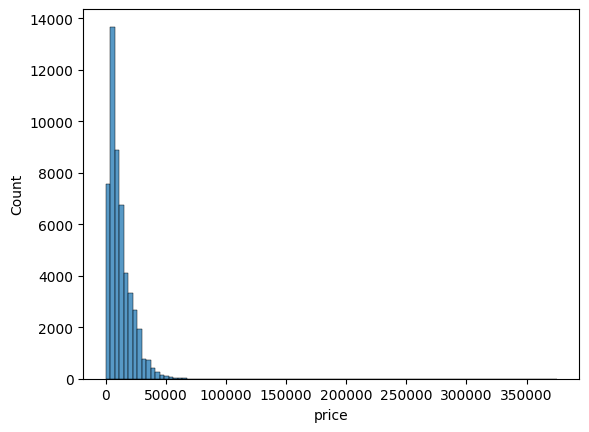

In [36]:
sns.histplot(data['price'], bins=100)
plt.show()

In [37]:
data['price'].describe()

count     51525.000000
mean      12132.464920
std       10040.803015
min           1.000000
25%        5000.000000
50%        9000.000000
75%       16839.000000
max      375000.000000
Name: price, dtype: float64

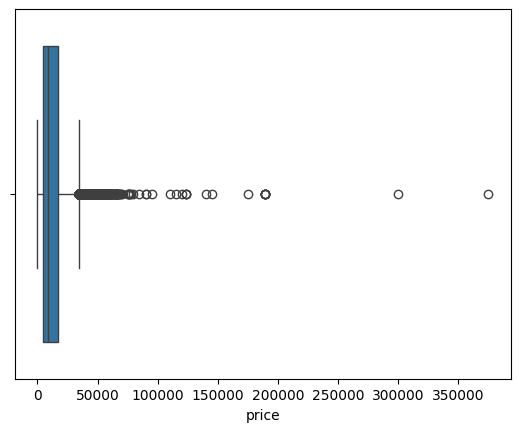

In [38]:
sns.boxplot(data=data, x='price')
plt.show()

In [39]:
q1_price = data['price'].describe()['25%']
q3_price = data['price'].describe()['75%']
iqr_price = q3_price - q1_price

lower_whisker_price = q1_price - 1.5 * iqr_price
upper_whisker_price = q3_price + 1.5 * iqr_price

print("Q1:", q1_price)
print("Q3:", q3_price)
print("Interquartile Range (IQR):", iqr_price)
print("Lower Whisker:", lower_whisker_price)
print("Upper Whisker:", upper_whisker_price)

Q1: 5000.0
Q3: 16839.0
Interquartile Range (IQR): 11839.0
Lower Whisker: -12758.5
Upper Whisker: 34597.5


In [40]:
data.loc[(data['price'] < -12758.5) | (data['price'] > 34597.5)]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_posted,year_posted,month_posted,car_age,odo_per_year
42,34900.0,2013,mercedes-benz benze sprinter 2500,3,6,diesel,106687,automatic,van,black,False,2019-01-15,16,1,2019,1,7,15241.000000
99,39950.0,2018,chevrolet silverado,3,8,gas,18500,automatic,truck,unstated,True,2018-08-05,16,6,2018,8,1,18500.000000
124,37000.0,2018,chevrolet silverado 1500 crew,2,8,gas,30465,other,pickup,white,True,2019-01-13,55,6,2019,1,2,15232.500000
142,39990.0,2015,chevrolet corvette,4,8,gas,17340,manual,coupe,unstated,False,2018-07-14,38,5,2018,7,4,4335.000000
188,52000.0,2008,ford f350 super duty,2,8,diesel,117500,automatic,truck,grey,True,2018-06-27,24,2,2018,6,11,10681.818182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51291,47995.0,2018,ford f-250 sd,2,8,diesel,7073,automatic,truck,silver,True,2018-08-03,23,4,2018,8,1,7073.000000
51310,34995.0,2014,ford mustang,4,8,gas,7950,manual,coupe,black,False,2018-07-11,57,2,2018,7,5,1590.000000
51342,40990.0,2016,ram 1500,3,8,diesel,107930,automatic,truck,white,True,2019-03-17,23,6,2019,3,4,26982.500000
51463,35500.0,2015,gmc sierra 2500hd,2,8,diesel,106973,automatic,truck,black,True,2018-05-04,15,4,2018,5,4,26743.250000


Based on this analysis on column price:

1. Outliyers detected that may be caused by typos (1646 rows)
2. There are values that doesnt make sense where the price is only bellow 10 even 1.

Car Age

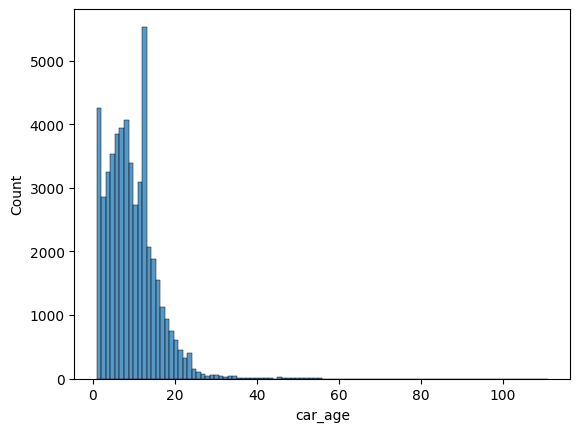

In [41]:
sns.histplot(data['car_age'], bins=100)
plt.show()

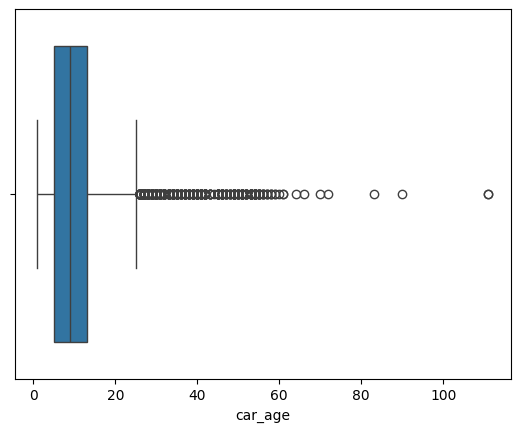

In [42]:
sns.boxplot(data=data, x='car_age')
plt.show()

In [43]:
q1_car_age = data['car_age'].describe()['25%']
q3_car_age = data['car_age'].describe()['75%']
iqr_car_age = q3_car_age - q1_car_age

lower_whisker_car_age = q1_car_age - 1.5 * iqr_car_age
upper_whisker_car_age = q3_car_age + 1.5 * iqr_car_age

print("Q1:", q1_car_age)
print("Q3:", q3_car_age)
print("Interquartile Range (IQR):", iqr_car_age)
print("Lower Whisker:", lower_whisker_car_age)
print("Upper Whisker:", upper_whisker_car_age)

Q1: 5.0
Q3: 13.0
Interquartile Range (IQR): 8.0
Lower Whisker: -7.0
Upper Whisker: 25.0


In [44]:
data.loc[(data['car_age'] < -7) | (data['car_age'] > 25)]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_posted,year_posted,month_posted,car_age,odo_per_year
63,30000.0,1966,ford mustang,3,6,gas,51000,manual,convertible,red,False,2019-01-23,17,2,2019,1,54,944.444444
140,2000.0,1993,ford f-150,2,8,gas,258225,automatic,truck,red,False,2019-03-06,34,2,2019,3,27,9563.888889
255,5500.0,1981,chevrolet corvette,1,8,gas,75000,automatic,coupe,blue,False,2019-01-15,49,1,2019,1,39,1923.076923
357,16600.0,1975,chevrolet corvette,3,8,gas,75000,manual,coupe,unstated,False,2019-03-09,69,5,2019,3,45,1666.666667
358,18400.0,1975,chevrolet corvette,3,8,gas,18000,automatic,coupe,orange,False,2019-01-06,41,6,2019,1,45,400.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51063,5500.0,1990,gmc sierra 1500,1,8,gas,312000,automatic,truck,blue,True,2018-07-13,21,4,2018,7,29,10758.620690
51152,3900.0,1988,ford f350,2,8,gas,30000,automatic,truck,unstated,False,2018-08-27,43,0,2018,8,31,967.741935
51176,2500.0,1993,toyota 4runner,1,6,gas,288662,manual,offroad,black,True,2019-03-16,39,5,2019,3,27,10691.185185
51325,2800.0,1989,ford ranger,2,6,gas,220000,manual,truck,black,True,2018-10-27,37,5,2018,10,30,7333.333333


In [45]:
car_age = data.copy()

In [46]:
car_age_slice = car_age.query('car_age < 25')

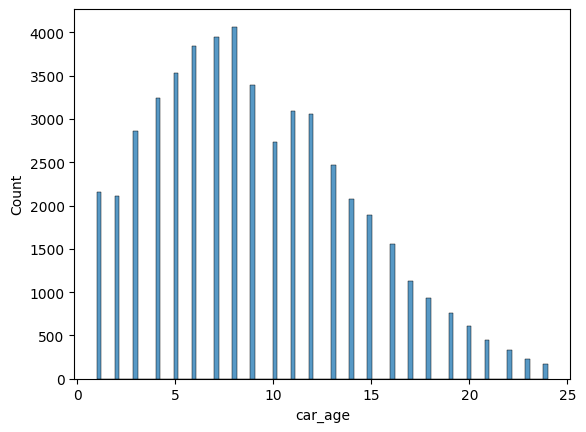

In [47]:
sns.histplot(car_age_slice['car_age'], bins=100)
plt.show()

In [48]:
q1_car_real = car_age_slice['car_age'].describe()['25%']
q3_car_real = car_age_slice['car_age'].describe()['75%']
iqr_car_real = q3_car_real - q1_car_real

lower_whisker_car_real = q1_car_real - 1.5 * iqr_car_real
upper_whisker_car_real = q3_car_real + 1.5 * iqr_car_real

print("Q1:", q1_car_real)
print("Q3:", q3_car_real)
print("Interquartile Range (IQR):", iqr_car_real)
print("Lower Whisker:", lower_whisker_car_real)
print("Upper Whisker:", upper_whisker_car_real)

Q1: 5.0
Q3: 12.0
Interquartile Range (IQR): 7.0
Lower Whisker: -5.5
Upper Whisker: 22.5


Based on the calculation on car_age:

1. There are 737 outliers.
2. Theres odd value when car manufactured before 1960 where some of them has not released yet.

Odometer

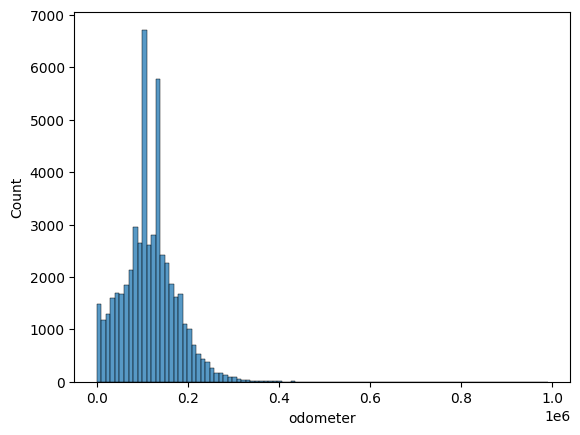

In [49]:
sns.histplot(data['odometer'], bins=100)
plt.show()

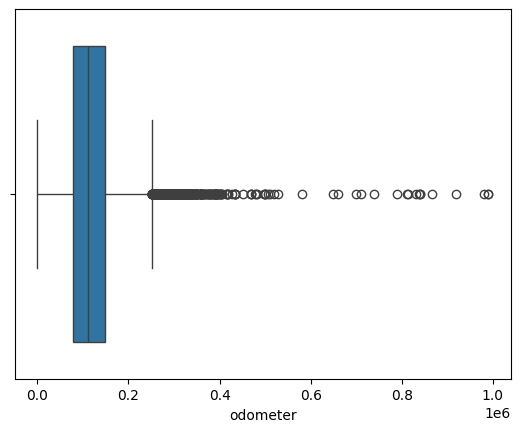

In [50]:
sns.boxplot(data=data, x='odometer')
plt.show()

In [51]:
q1_odometer = data['odometer'].describe()['25%']
q3_odometer = data['odometer'].describe()['75%']
iqr_odometer = q3_odometer - q1_odometer

lower_whisker_odometer = q1_odometer - 1.5 * iqr_odometer
upper_whisker_odometer = q3_odometer + 1.5 * iqr_odometer

print("Q1:", q1_odometer)
print("Q3:", q3_odometer)
print("Interquartile Range (IQR):", iqr_odometer)
print("Lower Whisker:", lower_whisker_odometer)
print("Upper Whisker:", upper_whisker_odometer)

Q1: 79009.0
Q3: 147821.0
Interquartile Range (IQR): 68812.0
Lower Whisker: -24209.0
Upper Whisker: 251039.0


In [52]:
data.loc[(data['odometer'] < -24209) | (data['odometer'] > 251039)]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_posted,year_posted,month_posted,car_age,odo_per_year
33,3890.0,2011,subaru outback,3,4,gas,300000,automatic,SUV,white,True,2018-12-25,31,1,2018,12,8,37500.000000
45,2400.0,2001,toyota camry,2,4,gas,277564,automatic,coupe,yellow,False,2018-05-27,51,6,2018,5,18,15420.222222
49,3200.0,2006,honda civic,3,4,gas,255390,automatic,sedan,blue,False,2018-10-18,23,3,2018,10,13,19645.384615
140,2000.0,1993,ford f-150,2,8,gas,258225,automatic,truck,red,False,2019-03-06,34,2,2019,3,27,9563.888889
267,3250.0,2001,ford f150,1,8,gas,296000,automatic,truck,black,True,2018-12-07,24,4,2018,12,18,16444.444444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51188,2500.0,2002,honda odyssey,2,6,gas,261000,automatic,mini-van,silver,False,2018-07-19,39,3,2018,7,17,15352.941176
51215,1800.0,2011,dodge grand caravan,3,6,gas,284000,automatic,mini-van,silver,False,2018-08-02,15,3,2018,8,8,35500.000000
51250,1400.0,2009,chevrolet tahoe,2,8,gas,294000,automatic,SUV,black,True,2019-04-12,84,4,2019,4,11,26727.272727
51260,2900.0,2005,toyota sienna,2,6,gas,283771,automatic,wagon,yellow,False,2018-05-02,61,2,2018,5,14,20269.357143


Based on the analysis on column odometer:

1. There are 1025 outliers

Cylinders

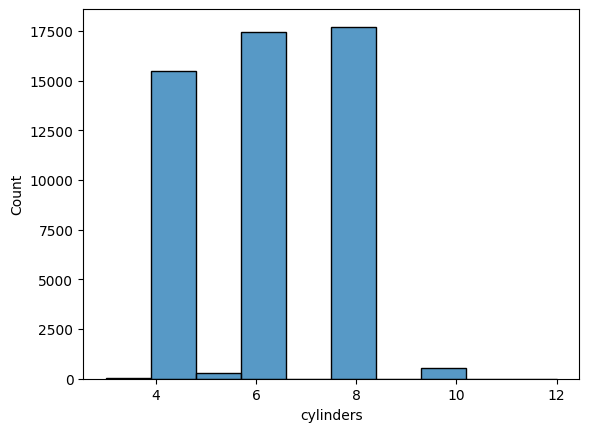

In [53]:
sns.histplot(data['cylinders'], bins=10)
plt.show()

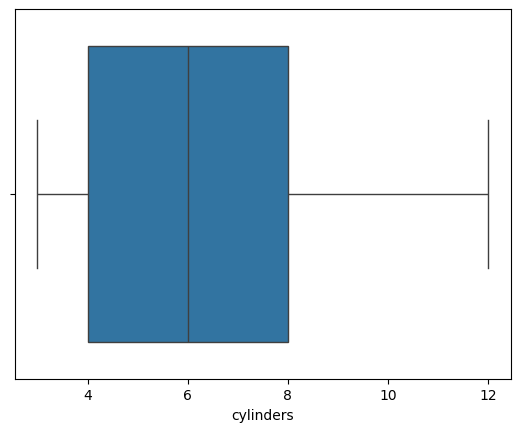

In [54]:
sns.boxplot(data=data, x='cylinders')
plt.show()

Based on the calculation on cylinders there are no anomalies with outliers

Handling Outliers

Based on calculation in chapter 1.6 the outliers are stated as bellow:

1. Price Lower Whisker: -12758.5 Upper Whisker: 34597.5
2. Car Age Lower Whisker: -7.0 Upper Whisker: 24.0
3. Odometer Lower Whisker: -24209.0 Upper Whisker: 251039.0
4. Condition Lower Whisker: 1 Upper Whisker: 4

In order to having reliable output informations, we will have to exclude the outliers and put it into new dataset called data_clean

In [57]:
list_of_selected_column = ['price', 'car_age', 'odometer']

def upper_lower_whisker(column_name=['price', 'car_age', 'odometer']):
    Q1 = data[column_name].quantile(0.25)
    Q3 = data[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker = Q1 - 1.5 * IQR
    upper_whisker = Q3 + 1.5 * IQR

    return lower_whisker_price, upper_whisker_price

lower_whisker, upper_whisker = upper_lower_whisker(column_name=list_of_selected_column[0])

data_clean = data.copy()

In [58]:
for column in list_of_selected_column:
    print('start cleaning outlier on', column)
    lower, upper = upper_lower_whisker(column)
    data_clean = data_clean[(data_clean[column] > lower) & (data_clean[column] < upper)]
    print('cleaning outlier on', column, 'was finished!')

start cleaning outlier on price
cleaning outlier on price was finished!
start cleaning outlier on car_age
cleaning outlier on car_age was finished!
start cleaning outlier on odometer
cleaning outlier on odometer was finished!


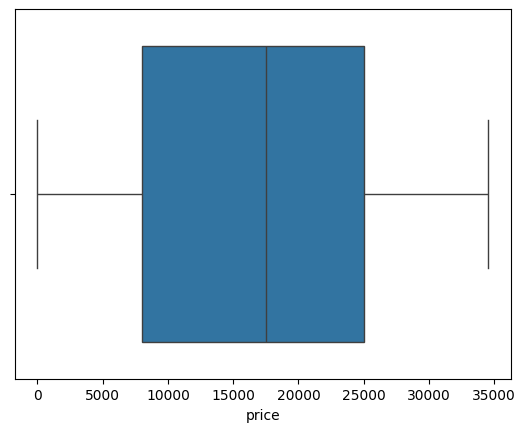

In [59]:
sns.boxplot(data=data_clean, x='price')
plt.show()

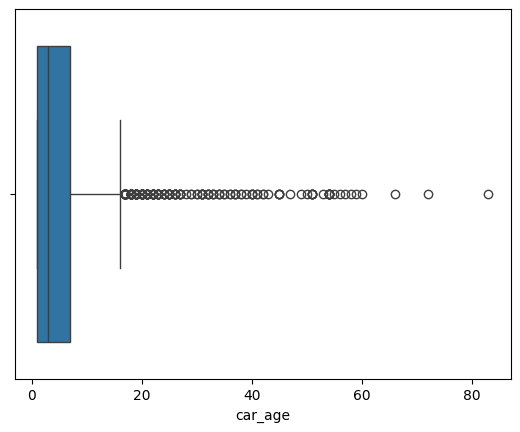

In [60]:
sns.boxplot(data=data_clean, x='car_age')
plt.show()

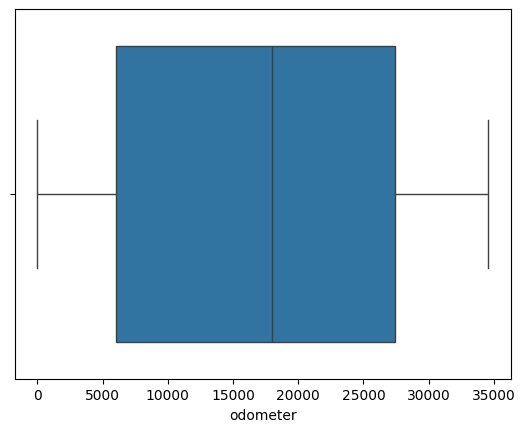

In [61]:
sns.boxplot(data=data_clean, x='odometer')
plt.show()

In [62]:
list_of_selected_column_age = ['car_age']

def upper_lower_whisker_age(column_name=('car_age')):
    Q1_age = data_clean[column_name].quantile(0.25)
    Q3_age = data_clean[column_name].quantile(0.75)
    IQR_age = Q3_age - Q1_age
    lower_whisker_age = Q1_age - 1.5 * IQR_age
    upper_whisker_age = Q3_age + 1.5 * IQR_age

    return lower_whisker_age, upper_whisker_age

lower_whisker_age, upper_whisker_age = upper_lower_whisker_age(column_name=list_of_selected_column_age[0])

data_clean = data_clean.copy()


In [63]:
for column in list_of_selected_column_age:
    print('start cleaning outlier on', column)
    lower, upper = upper_lower_whisker_age(column)
    data_clean = data_clean[(data_clean[column] > lower) & (data_clean[column] < upper)]
    print('cleaning outlier on', column, 'was finished!')

start cleaning outlier on car_age
cleaning outlier on car_age was finished!


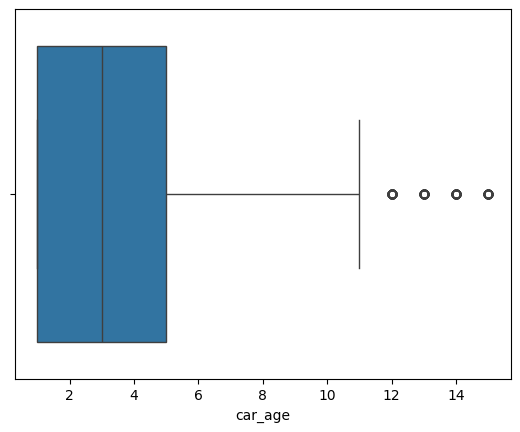

In [64]:
sns.boxplot(data=data_clean, x='car_age')
plt.show()

**Studying Core Parameters Without Outliers**

Price

<Axes: >

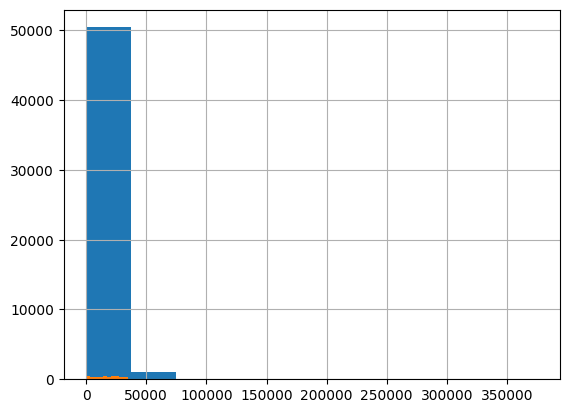

In [65]:
data['price'].hist(bins=10)
data_clean['price'].hist(bins=10)

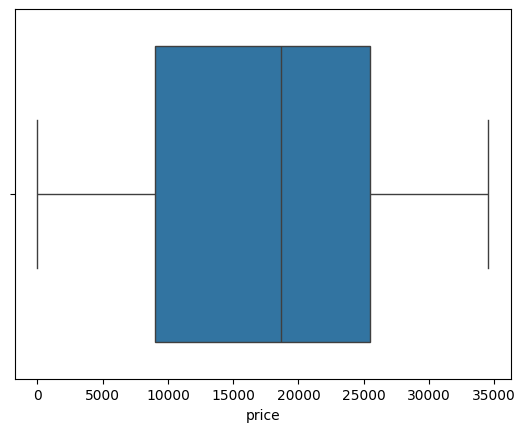

In [66]:
sns.boxplot(data=data_clean, x='price')
plt.show()

In [67]:
q1_price = data_clean['price'].describe()['25%']
q3_price = data_clean['price'].describe()['75%']
iqr_price = q3_price - q1_price

lower_whisker_price = q1_price - 1.5 * iqr_price
upper_whisker_price = q3_price + 1.5 * iqr_price

print("Q1:", q1_price)
print("Q3:", q3_price)
print("Interquartile Range (IQR):", iqr_price)
print("Lower Whisker:", lower_whisker_price)
print("Upper Whisker:", upper_whisker_price)

Q1: 8996.5
Q3: 25511.25
Interquartile Range (IQR): 16514.75
Lower Whisker: -15775.625
Upper Whisker: 50283.375


In [68]:
data_clean.loc[data_clean['price'] > 50495.0]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_posted,year_posted,month_posted,car_age,odo_per_year


Car Age

<Axes: >

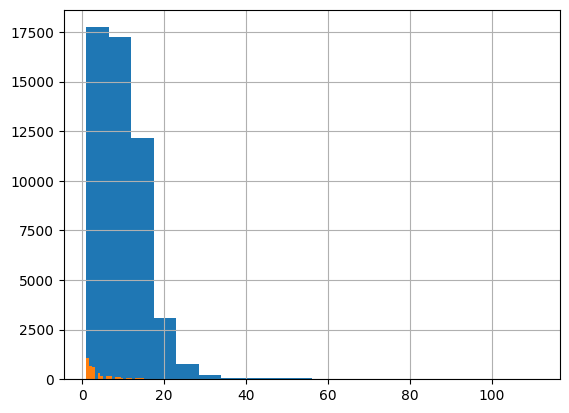

In [69]:
data['car_age'].hist(bins=20)
data_clean['car_age'].hist(bins=20)

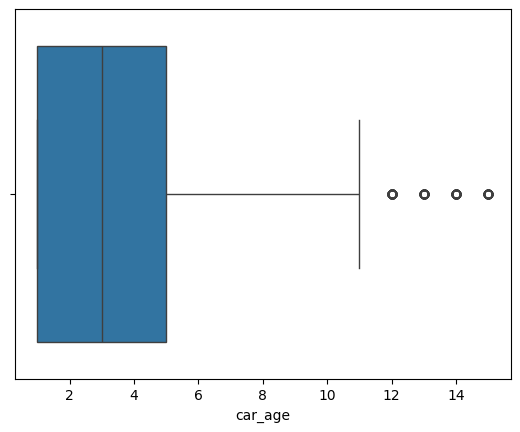

In [70]:
sns.boxplot(data=data_clean, x='car_age')
plt.show()

Odometer

<Axes: >

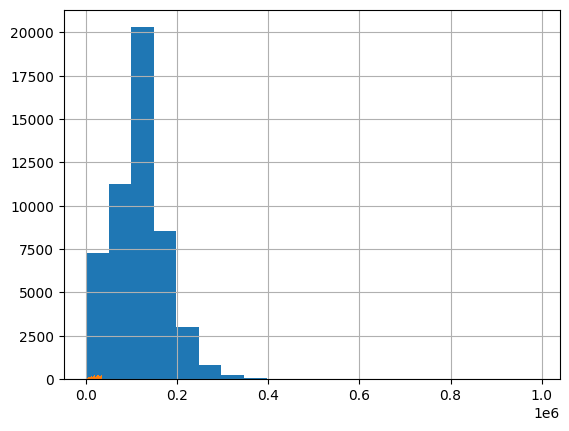

In [71]:
data['odometer'].hist(bins=20)
data_clean['odometer'].hist(bins=20)

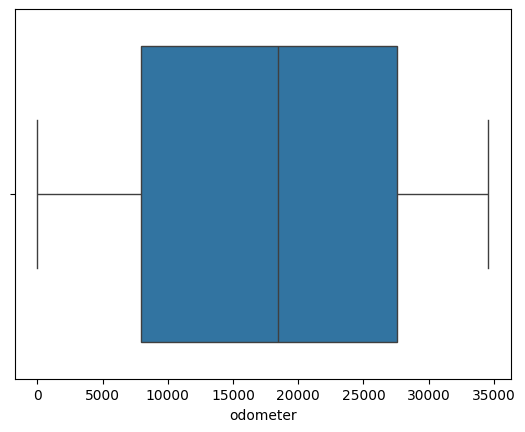

In [72]:
sns.boxplot(data=data_clean, x='odometer')
plt.show()

Conclusion

1. On column price and car_age they are no longer have outliers.
2. On column odometer there are still few outliers but the amount is way lower than before

**Detail Analysis**

Advertisement Time

In [73]:
mean_ad = data_clean['days_listed'].mean()
median_ad = data_clean['days_listed'].median()
print('Average time for adversitement:', mean_ad.round(2), 'days')
print('Median time for advertisement:', median_ad, 'days')

Average time for adversitement: 39.0 days
Median time for advertisement: 33.0 days


In [74]:
q1_ad = data_clean['days_listed'].describe()['25%']
q3_ad = data_clean['days_listed'].describe()['75%']
iqr_ad = q3_ad - q1_ad

lower_whisker_ad = q1_ad - 1.5 * iqr_ad
upper_whisker_ad = q3_ad + 1.5 * iqr_ad

print("Q1:", q1_ad)
print("Q3:", q3_ad)
print("Interquartile Range (IQR):", iqr_ad)

Q1: 19.0
Q3: 53.0
Interquartile Range (IQR): 34.0


In [75]:
fast_sell = data_clean.query('days_listed < 19')
average_sell = data_clean.query('days_listed >= 19 & days_listed <= 53')
slow_sell = data_clean.query('days_listed > 53')
print('Percentage of fast sell ad:', len(fast_sell),'cars')
print('Percentage of average sell ad:', len(average_sell),'cars')
print('Percentage of slow sell ad:', len(slow_sell),'cars')

Percentage of fast sell ad: 943 cars
Percentage of average sell ad: 1940 cars
Percentage of slow sell ad: 929 cars


Based on calculation above:

1. The average of ad is 33 to 39 days until it taken down.
2. If we use statistical approach, we can say when the ad is categorize as fast sell when its only needs 19 days to be taken down, and if its over 53 days then it categorize as slow sell.

Average Price of Each Type of Vehicle

In [76]:
ad_count = data_clean.pivot_table(index='type', values='days_listed', aggfunc='sum').sort_values('days_listed', ascending=False)


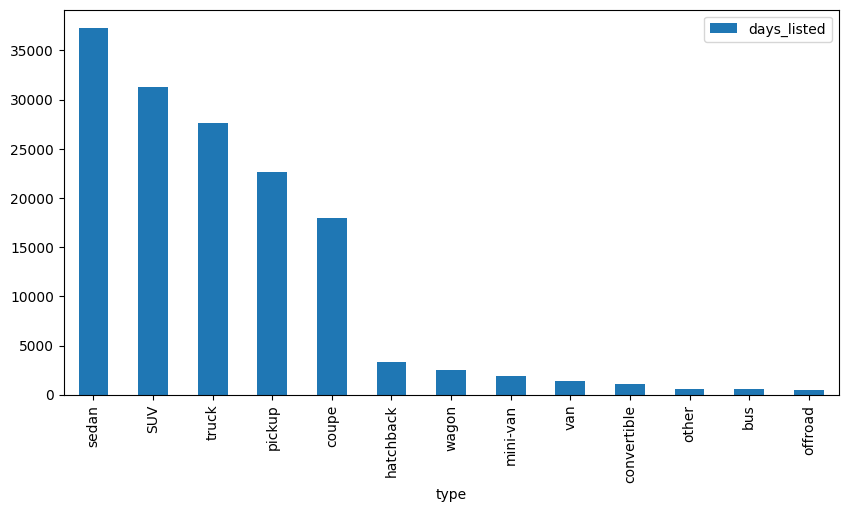

In [77]:
ad_count.plot(kind='bar', figsize=(10,5))
plt.show()

In [78]:
#Bus
bus = data_clean.query("type == 'bus'")
bus.head(2)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_posted,year_posted,month_posted,car_age,odo_per_year
1349,28990.0,2011,ford econoline,2,10,gas,17037,automatic,bus,white,False,2018-08-20,73,0,2018,8,8,2129.625
9649,28990.0,2011,ford econoline,2,10,gas,17037,automatic,bus,white,False,2018-08-10,12,4,2018,8,8,2129.625


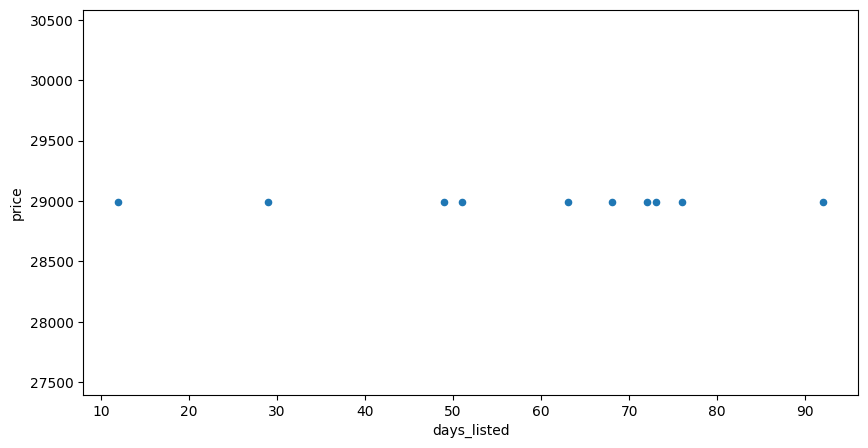

In [79]:
bus.plot(x='days_listed', y='price', kind='scatter', figsize=(10,5))
plt.show()

In [81]:
#Hatchback
hatchback = data_clean.query("type == 'hatchback'")
hatchback.head(2)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_posted,year_posted,month_posted,car_age,odo_per_year
695,16200.0,2018,kia soul,4,4,gas,25334,automatic,hatchback,unstated,False,2018-07-08,56,6,2018,7,1,25334.0
901,23000.0,2018,honda civic,5,4,gas,13800,automatic,hatchback,unstated,False,2018-08-18,25,5,2018,8,1,13800.0


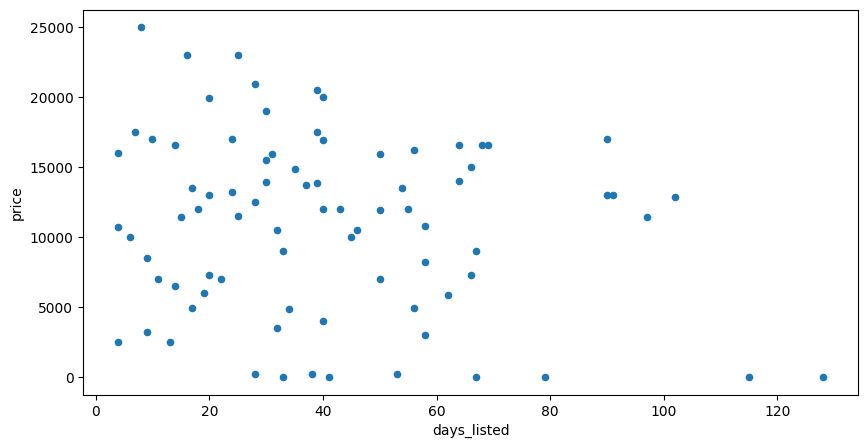

In [82]:
hatchback.plot(x='days_listed', y='price', kind='scatter', figsize=(10,5))
plt.show()

In [83]:
#Pick up
pickup = data_clean.query("type == 'pickup'")
pickup.head(2)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_posted,year_posted,month_posted,car_age,odo_per_year
54,30300.0,2017,ford f150 supercrew cab xlt,2,6,gas,30339,automatic,pickup,brown,True,2018-07-15,14,6,2018,7,2,15169.5
71,23300.0,2018,nissan frontier crew cab sv,2,6,gas,27493,other,pickup,unstated,True,2018-10-13,36,5,2018,10,1,27493.0


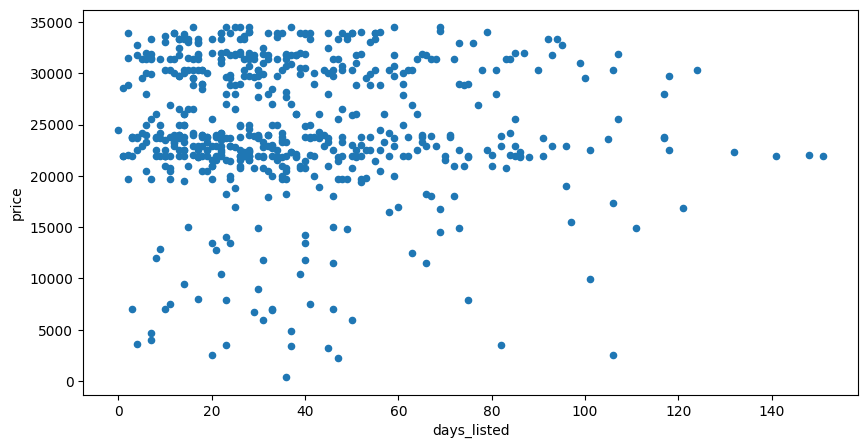

In [84]:
pickup.plot(x='days_listed', y='price', kind='scatter', figsize=(10,5))
plt.show()

In [85]:
data_use = data_clean.query('type in ("SUV", "sedan")')
data_use.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,weekday_posted,year_posted,month_posted,car_age,odo_per_year
13,16500.0,2018,hyundai sonata,3,4,gas,22104,automatic,sedan,silver,False,2019-01-14,29,0,2019,1,2,11052.0
19,13990.0,2018,hyundai elantra,3,4,gas,31932,automatic,sedan,red,False,2018-08-25,27,5,2018,8,1,31932.0
64,15999.0,2017,chevrolet cruze,2,4,gas,17498,automatic,sedan,black,False,2018-11-07,54,2,2018,11,2,8749.0
93,32000.0,2017,honda pilot,4,6,gas,32104,automatic,SUV,white,False,2018-07-12,100,3,2018,7,2,16052.0
190,23000.0,2018,honda accord,4,4,gas,15000,manual,sedan,unstated,False,2018-08-22,37,2,2018,8,1,15000.0


Price Factor¶

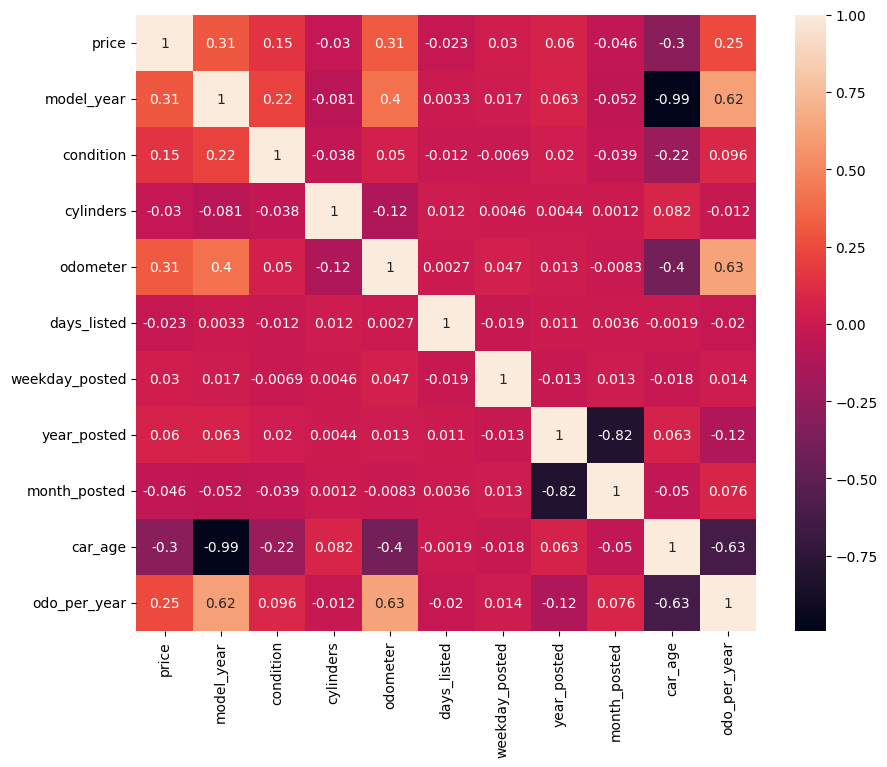

In [88]:
correlation = data_use.select_dtypes(include=['number']).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True)
plt.show()

Based on the correlation table we can conclude that:

1. The younger the car the more expensive the price is. (positive correlation)
2. When the milleage is higher the price tend to be more cheaper. (negative correlation)
3. The higher the capacity of the engine (cylinder) the more expensive the car is. (positive correlation)

Categoric Analysis

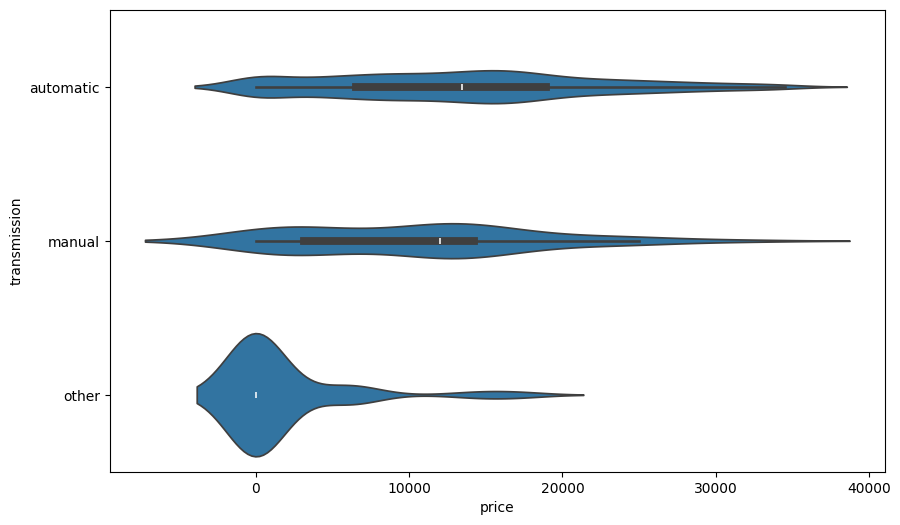

In [89]:
# Transmission vs Price
plt.figure(figsize=(10, 6))
sns.violinplot(data=data_use, x='price', y='transmission')
plt.show()

Based on the analysis held on transmission against price:

1. Automatic and manual transmission has cheaper price compared to other type of transmission.

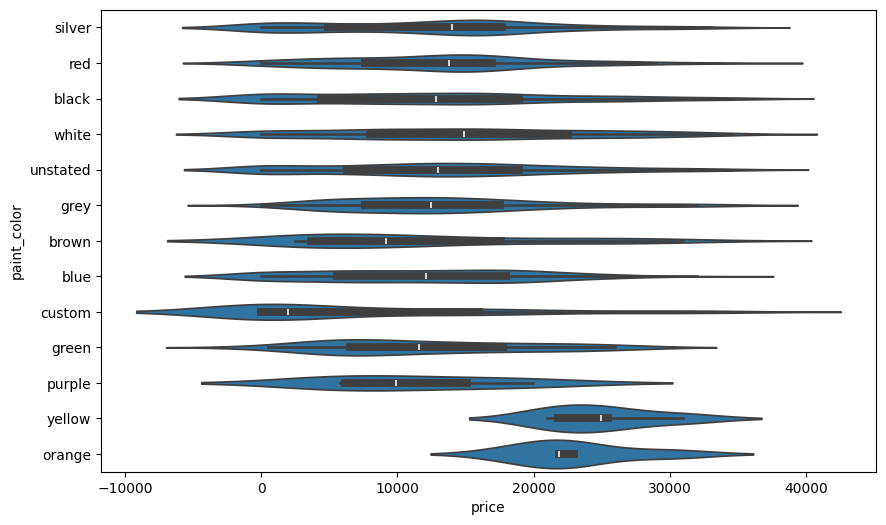

In [90]:
# Color vs Price
plt.figure(figsize=(10, 6))
sns.violinplot(data=data_use, x='price', y='paint_color')
plt.show()

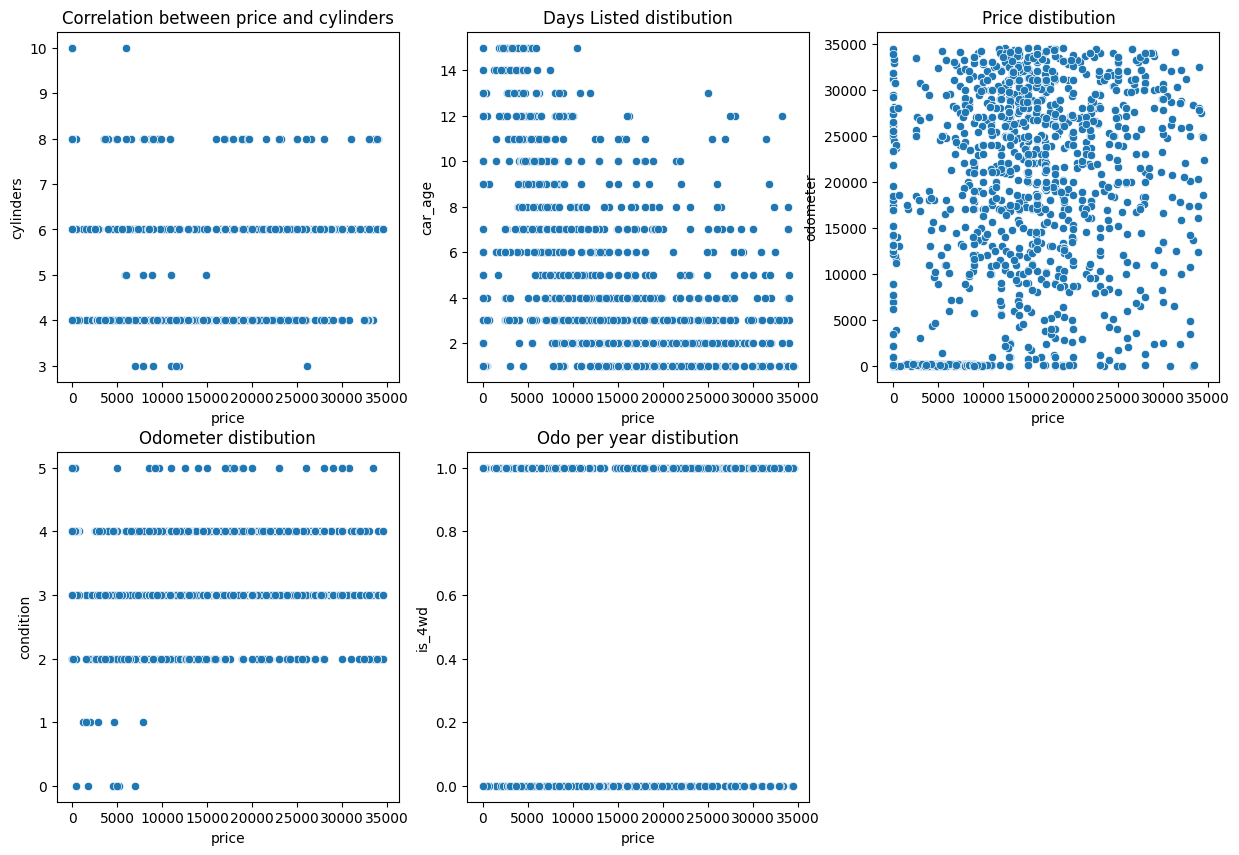

In [91]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.title('Correlation between price and cylinders')
sns.scatterplot(data=data_use, x='price', y='cylinders')

plt.subplot(2, 3, 2)
plt.title('Days Listed distibution')
sns.scatterplot(data=data_use, x='price', y='car_age')

plt.subplot(2, 3, 3)
plt.title('Price distibution')
sns.scatterplot(data=data_use, x='price', y='odometer')

plt.subplot(2, 3, 4)
plt.title('Odometer distibution')
sns.scatterplot(data=data_use, x='price', y='condition')

plt.subplot(2, 3, 5)
plt.title('Odo per year distibution')
sns.scatterplot(data=data_use, x='price', y='is_4wd')

plt.show()

Based on analysis held on paint color against price:

1. Yellow and orange are 2 top most expensive color
2. White tend to be more expensive also, followed by black and red
3. Other tacky color tend to have cheaper price

**Conclusion**

The purpose of this project is to know what parameter that has effects to the price of car sold. Therefore, the project has been done as the step bellow:

1. **Data Exploratory.** apakah ada nilai yang aneh atau anomali?:
    - Missing value has been found in column is_4wd, paint_color, odometer, and cylinder.
    - Outliers were found in column price, odometer, and car_age.
    - The date format was not proper.
    - The type of values were not proper.
2. **Data Exploratory.** bagaimana nilai anomali itu bisa terjadi?:
    - It may be caused by typo.
3. **Handling Data Anomalies.** In order to fix the problem stated in number 1. We have decided to run things as bellow:
    - Filled the missing values in column is_4wd and cylinder with 0. Filled missing value in paint_color with text unstated instead of blank, and filled missing value in odometer with mean of model_year.
    - Erased outlier values in price, car_age, odometer since the amount is not significant.
    - Format the date with to_datetime method.
    - Format the type with astype method.
4. **Analysis.** In this step we focus on parameters that might have correlation with price as the goal of the project. The method used such as creating the histograms and charts, find out the correlation using corr() method and violinplot.
5. **Hypothesis**. apa insight awal yang kamu harapkan?
    - The thing that influenced the car price are mileage, age, engine capacity.
4. **Summary.** Based on the anaylis that has been done, we know that:
    - There are 3 main factor that play significant affect the price of car sold, they are age, milleage, and engine capacity.
    - The younger the car the more expensive the price is. (positive correlation)
    - When the milleage is higher the price tend to be more cheaper. (negative correlation)